In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

**House data link https://www.kaggle.com/datasets/harlfoxem/housesalesprediction .**

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


# EDA


In [4]:
#print the shape of df

print (df.shape)

(21613, 21)


In [5]:
# Checking for null values in the dataframe df

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# Checking for duplicated rows, if any.

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
#price ranges from 75000 to 7700000 , mean is 540000

C:\Users\Harshit Srivastava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

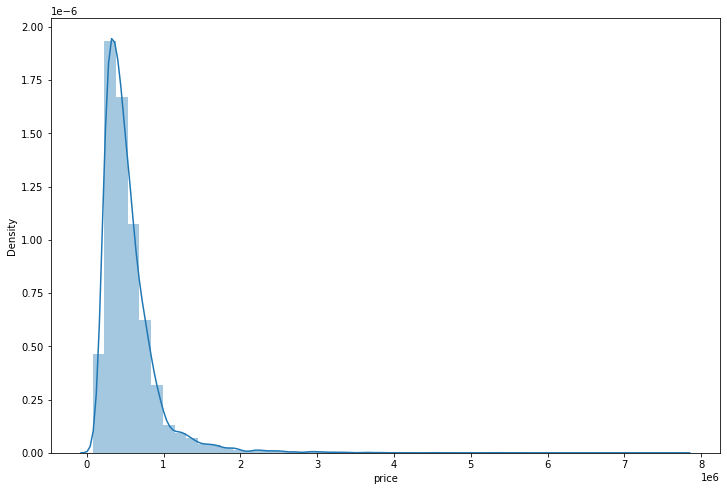

In [12]:
#visulizing target column 'price'
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

<AxesSubplot:>

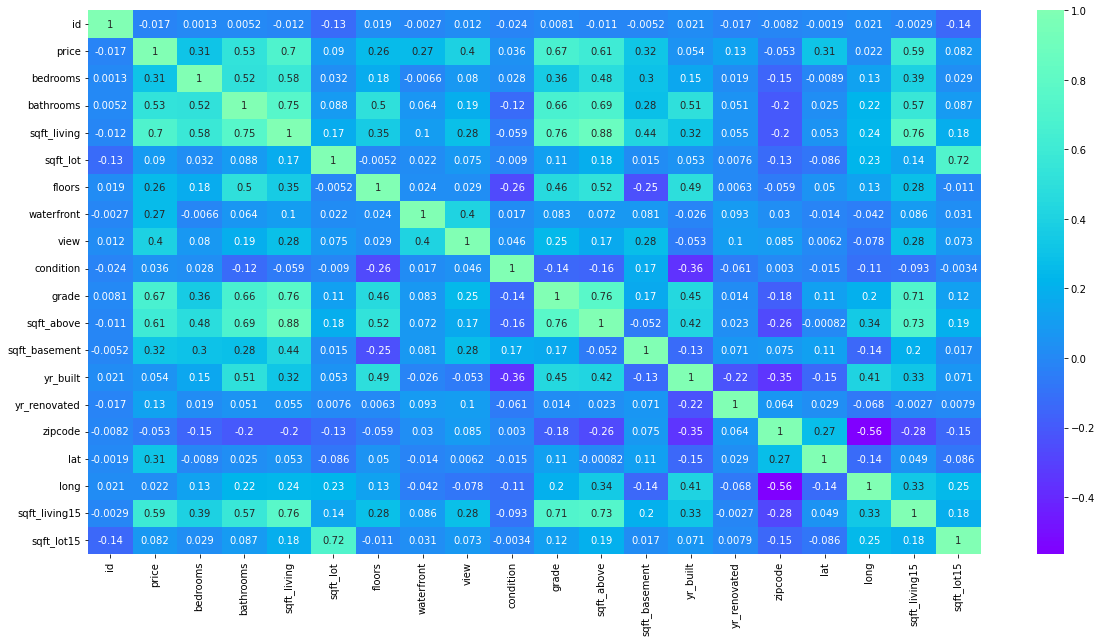

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), center=True, cmap='rainbow', annot=True)

In [14]:
#finding correlation between price and other columns

df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [15]:
df.groupby('condition').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
condition,,,,,,,,,,,,,,,,,,,
1,4.823681e+09,334431.666667,2.466667,1.175000,1216.000000,22131.066667,1.150000,0.033333,0.300000,5.800000,1144.333333,71.666667,1931.533333,66.400000,98092.500000,47.577257,-122.260567,1802.666667,9940.233333
2,4.192506e+09,327287.145349,2.831395,1.449128,1410.058140,32502.901163,1.156977,0.005814,0.075581,6.505814,1243.604651,166.453488,1948.941860,45.965116,98092.046512,47.525012,-122.237233,1585.447674,19548.168605
3,4.645470e+09,542012.578148,3.374171,2.222632,2149.042050,14758.281733,1.620554,0.006486,0.213385,7.826741,1906.819756,242.222293,1979.463117,104.855035,98078.639798,47.564361,-122.202987,2043.879481,12513.670230
4,4.457794e+09,521200.390033,3.356929,1.900423,1950.991724,16019.821447,1.261138,0.008804,0.263427,7.382462,1590.753830,360.237894,1958.340201,47.509773,98072.490579,47.546711,-122.227555,1901.164642,13701.466984
5,4.486675e+09,612418.089359,3.460317,2.024397,2022.911229,13052.582011,1.271605,0.011758,0.324515,7.320988,1537.788948,485.122281,1946.448560,43.068195,98088.675485,47.572296,-122.255102,1842.560259,11119.460317


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

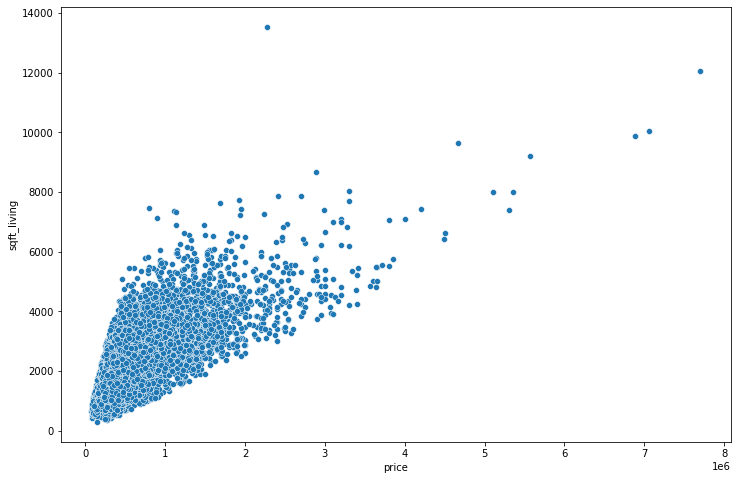

In [16]:
#let us look at sqft_living

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

In [17]:
# IQR
Q1 = np.percentile(df['sqft_living'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['sqft_living'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper = np.where(df['sqft_living'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['sqft_living'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

New Shape:  (21041, 21)


In [18]:
#let us look at grade column

df.groupby('grade').mean()['price']


grade
1     1.420000e+05
3     2.056667e+05
4     2.143810e+05
5     2.485240e+05
6     3.019196e+05
7     4.024718e+05
8     5.416701e+05
9     7.641898e+05
10    9.954483e+05
11    1.240117e+06
12    1.710000e+06
Name: price, dtype: float64

In [19]:

df.groupby('grade').count()['id']


grade
1        1
3        3
4       29
5      242
6     2038
7     8977
8     6049
9     2541
10     951
11     196
12      14
Name: id, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='price'>

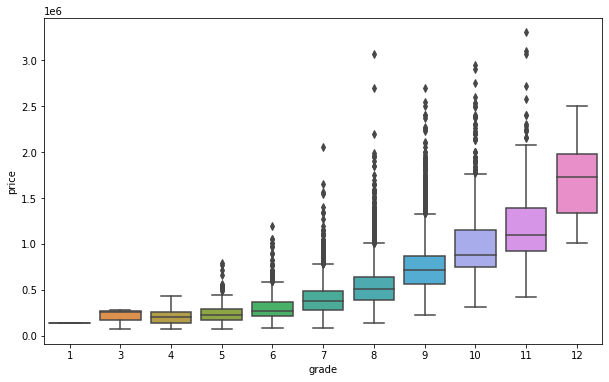

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade',y='price',data=df)

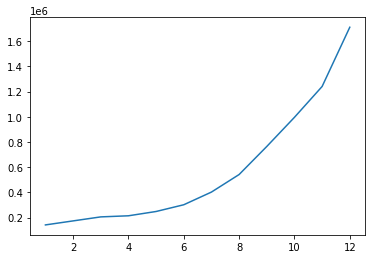

In [21]:
plt.plot(df.groupby('grade').mean()['price'])
#exponential curve

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

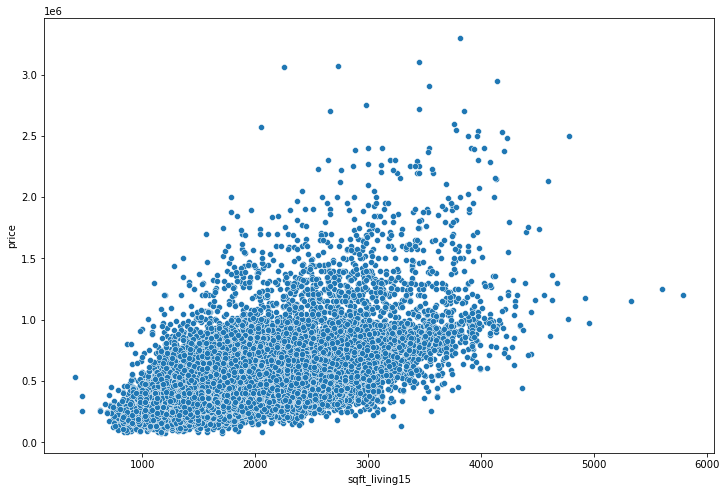

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='sqft_living15', y='price', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

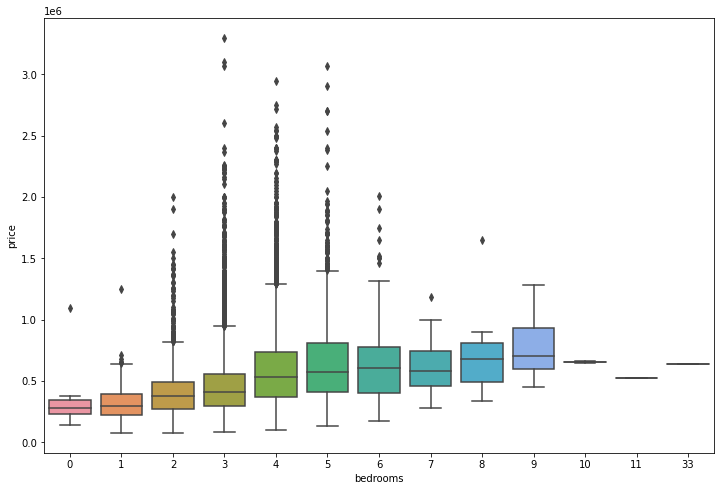

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

# Geographical Properties

<AxesSubplot:xlabel='price', ylabel='long'>

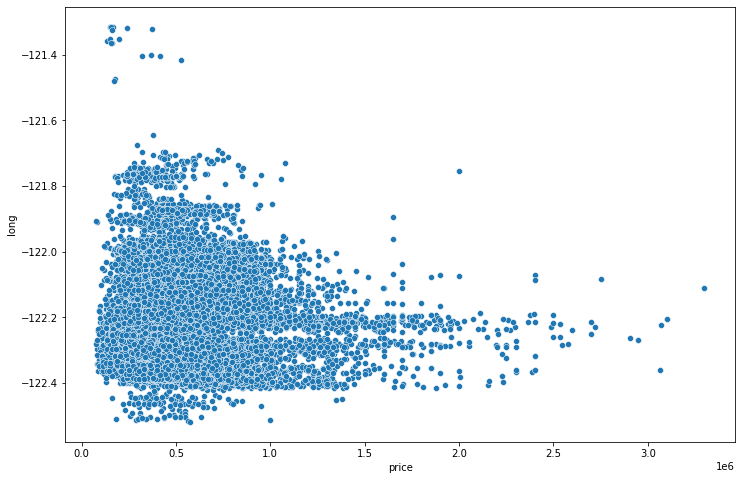

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

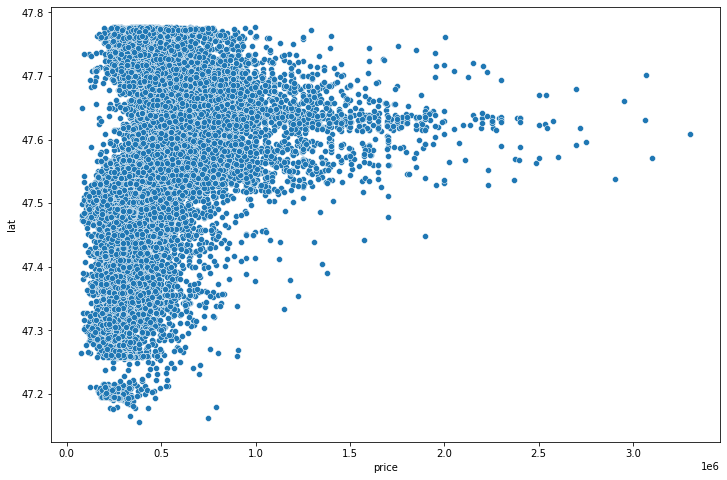

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

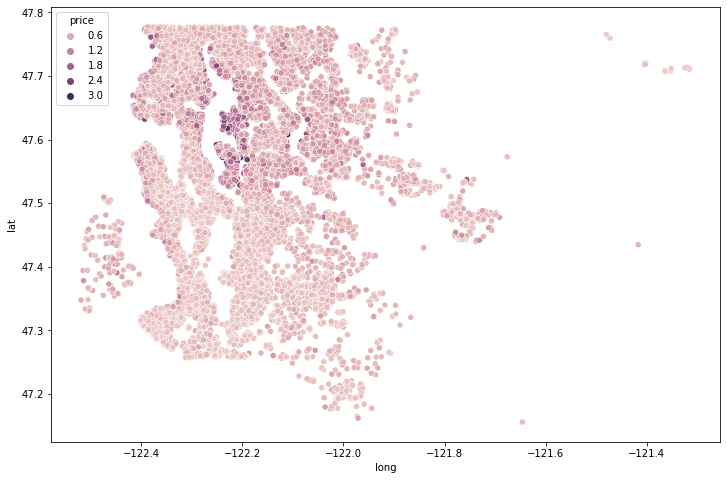

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

**Other Features**

<AxesSubplot:xlabel='waterfront', ylabel='price'>

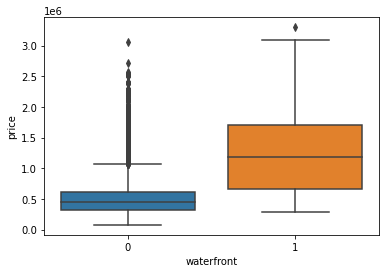

In [27]:
sns.boxplot(x='waterfront',y='price',data=df)

<AxesSubplot:xlabel='view', ylabel='price'>

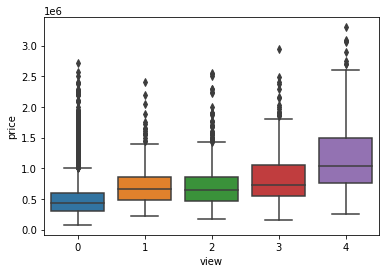

In [28]:
sns.boxplot(x='view',y='price',data=df)

<AxesSubplot:xlabel='condition', ylabel='price'>

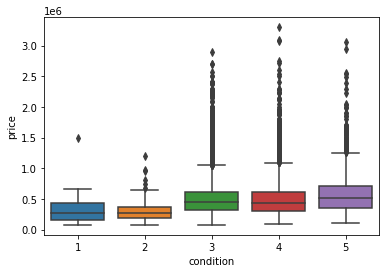

In [29]:

sns.boxplot(x='condition',y='price',data=df)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

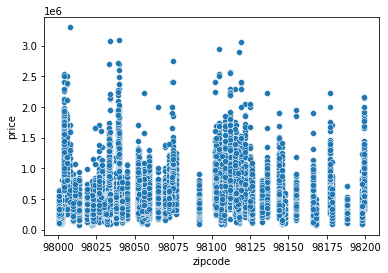

In [30]:
sns.scatterplot(x='zipcode',y='price',data=df)

# Working with Feature Data

In [31]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21041 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21041 non-null  int64  
 1   date           21041 non-null  object 
 2   price          21041 non-null  float64
 3   bedrooms       21041 non-null  int64  
 4   bathrooms      21041 non-null  float64
 5   sqft_living    21041 non-null  int64  
 6   sqft_lot       21041 non-null  int64  
 7   floors         21041 non-null  float64
 8   waterfront     21041 non-null  int64  
 9   view           21041 non-null  int64  
 10  condition      21041 non-null  int64  
 11  grade          21041 non-null  int64  
 12  sqft_above     21041 non-null  int64  
 13  sqft_basement  21041 non-null  int64  
 14  yr_built       21041 non-null  int64  
 15  yr_renovated   21041 non-null  int64  
 16  zipcode        21041 non-null  int64  
 17  lat            21041 non-null  float64
 18  long  

In [33]:
df = df.drop('id',axis=1)

In [34]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


# Feature Engineering from Date

In [35]:
df['date'] = pd.to_datetime(df['date'])

In [36]:
df['month'] = df['date'].apply(lambda date:date.month)

In [37]:
df['year'] = df['date'].apply(lambda date:date.year)

In [38]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014


In [39]:
df = df.drop('date',axis=1)

In [40]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014


In [41]:
df.corr()['price']

price            1.000000
bedrooms         0.277267
bathrooms        0.454394
sqft_living      0.628597
sqft_lot         0.068966
floors           0.250106
waterfront       0.214394
view             0.357379
condition        0.057632
grade            0.637545
sqft_above       0.522928
sqft_basement    0.253437
yr_built         0.021317
yr_renovated     0.135583
zipcode         -0.023362
lat              0.366520
long             0.009303
sqft_living15    0.567262
sqft_lot15       0.057106
month           -0.020854
year             0.013924
Name: price, dtype: float64

<AxesSubplot:xlabel='year', ylabel='price'>

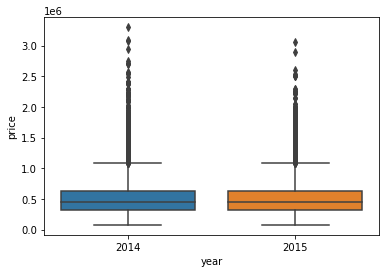

In [42]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

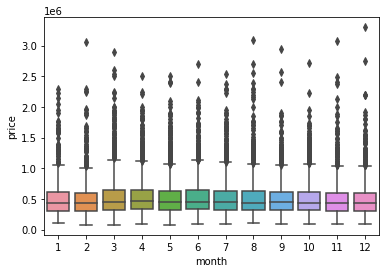

In [43]:
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

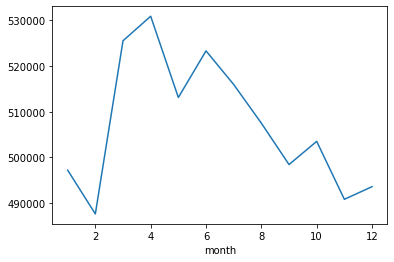

In [44]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

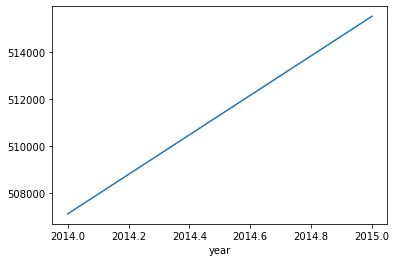

In [45]:
df.groupby('year').mean()['price'].plot()

In [46]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [47]:
df = df.drop('zipcode',axis=1)

# Scaling and Train Test Split

In [73]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [76]:
X_train= scaler.fit_transform(X_train)

In [77]:
X_test = scaler.transform(X_test)

In [78]:
X_train.shape

(14728, 19)

In [79]:
X_test.shape

(6313, 19)

# Creating a Model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [209]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [210]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=300)

Epoch 1/300
116/116 [==============================] - 1s 2ms/step - loss: 345347719168.0000 - val_loss: 328655536128.0000
Epoch 2/300
116/116 [==============================] - 0s 1ms/step - loss: 339389743104.0000 - val_loss: 304775331840.0000
Epoch 3/300
116/116 [==============================] - 0s 2ms/step - loss: 230847676416.0000 - val_loss: 90590609408.0000
Epoch 4/300
116/116 [==============================] - 0s 2ms/step - loss: 63500615680.0000 - val_loss: 50487136256.0000
Epoch 5/300
116/116 [==============================] - 0s 2ms/step - loss: 56378462208.0000 - val_loss: 49113563136.0000
Epoch 6/300
116/116 [==============================] - 0s 2ms/step - loss: 54928769024.0000 - val_loss: 47657365504.0000
Epoch 7/300
116/116 [==============================] - 0s 2ms/step - loss: 53449437184.0000 - val_loss: 46595854336.0000
Epoch 8/300
116/116 [==============================] - 0s 1ms/step - loss: 51979763712.0000 - val_loss: 44937084928.0000
Epoch 9/300
116/116 [======

116/116 [==============================] - 1s 5ms/step - loss: 25479579648.0000 - val_loss: 23033198592.0000
Epoch 69/300
116/116 [==============================] - 1s 6ms/step - loss: 25412014080.0000 - val_loss: 23046977536.0000
Epoch 70/300
116/116 [==============================] - 1s 4ms/step - loss: 25326882816.0000 - val_loss: 22975823872.0000
Epoch 71/300
116/116 [==============================] - 1s 6ms/step - loss: 25258964992.0000 - val_loss: 23015260160.0000
Epoch 72/300
116/116 [==============================] - 1s 6ms/step - loss: 25200517120.0000 - val_loss: 22840745984.0000
Epoch 73/300
116/116 [==============================] - 1s 6ms/step - loss: 25132492800.0000 - val_loss: 22867673088.0000
Epoch 74/300
116/116 [==============================] - 1s 6ms/step - loss: 25028450304.0000 - val_loss: 22737022976.0000
Epoch 75/300
116/116 [==============================] - 1s 6ms/step - loss: 24953466880.0000 - val_loss: 23086868480.0000
Epoch 76/300
116/116 [===============

Epoch 135/300
116/116 [==============================] - 1s 5ms/step - loss: 22688079872.0000 - val_loss: 21296472064.0000
Epoch 136/300
116/116 [==============================] - 1s 7ms/step - loss: 22663614464.0000 - val_loss: 21524830208.0000
Epoch 137/300
116/116 [==============================] - 1s 5ms/step - loss: 22608072704.0000 - val_loss: 21303525376.0000
Epoch 138/300
116/116 [==============================] - 1s 7ms/step - loss: 22686234624.0000 - val_loss: 21313642496.0000
Epoch 139/300
116/116 [==============================] - 1s 7ms/step - loss: 22590330880.0000 - val_loss: 21143603200.0000
Epoch 140/300
116/116 [==============================] - 0s 3ms/step - loss: 22649559040.0000 - val_loss: 21149644800.0000
Epoch 141/300
116/116 [==============================] - 0s 3ms/step - loss: 22581436416.0000 - val_loss: 21055985664.0000
Epoch 142/300
116/116 [==============================] - 1s 6ms/step - loss: 22548686848.0000 - val_loss: 21051555840.0000
Epoch 143/300
11

116/116 [==============================] - 1s 7ms/step - loss: 21453400064.0000 - val_loss: 20462317568.0000
Epoch 202/300
116/116 [==============================] - 1s 7ms/step - loss: 21499013120.0000 - val_loss: 20465682432.0000
Epoch 203/300
116/116 [==============================] - 0s 3ms/step - loss: 21375821824.0000 - val_loss: 20771223552.0000
Epoch 204/300
116/116 [==============================] - 1s 5ms/step - loss: 21451755520.0000 - val_loss: 20534757376.0000
Epoch 205/300
116/116 [==============================] - 1s 4ms/step - loss: 21342126080.0000 - val_loss: 20444917760.0000
Epoch 206/300
116/116 [==============================] - 1s 5ms/step - loss: 21342662656.0000 - val_loss: 20605124608.0000
Epoch 207/300
116/116 [==============================] - 1s 7ms/step - loss: 21353140224.0000 - val_loss: 20498667520.0000
Epoch 208/300
116/116 [==============================] - 1s 6ms/step - loss: 21334061056.0000 - val_loss: 20484089856.0000
Epoch 209/300
116/116 [=======

116/116 [==============================] - 1s 8ms/step - loss: 20347817984.0000 - val_loss: 20326844416.0000
Epoch 268/300
116/116 [==============================] - 1s 6ms/step - loss: 20376655872.0000 - val_loss: 19968862208.0000
Epoch 269/300
116/116 [==============================] - 0s 4ms/step - loss: 20305276928.0000 - val_loss: 20057597952.0000
Epoch 270/300
116/116 [==============================] - 1s 7ms/step - loss: 20336869376.0000 - val_loss: 20015822848.0000
Epoch 271/300
116/116 [==============================] - 1s 5ms/step - loss: 20302821376.0000 - val_loss: 20051824640.0000
Epoch 272/300
116/116 [==============================] - 1s 6ms/step - loss: 20283019264.0000 - val_loss: 20298999808.0000
Epoch 273/300
116/116 [==============================] - 1s 6ms/step - loss: 20333819904.0000 - val_loss: 20035282944.0000
Epoch 274/300
116/116 [==============================] - 1s 7ms/step - loss: 20246009856.0000 - val_loss: 20125954048.0000
Epoch 275/300
116/116 [=======

In [211]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

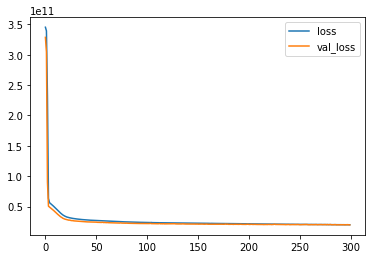

In [212]:
losses.plot()

# Evaluation on Test Data

In [213]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [214]:
X_test

array([[9.09090909e-02, 2.00000000e-01, 4.87309645e-01, ...,
        1.38776283e-02, 1.00000000e+00, 0.00000000e+00],
       [9.09090909e-02, 2.66666667e-01, 1.85279188e-01, ...,
        5.73249090e-04, 1.81818182e-01, 1.00000000e+00],
       [6.06060606e-02, 2.66666667e-01, 3.19796954e-01, ...,
        1.02327641e-03, 3.63636364e-01, 0.00000000e+00],
       ...,
       [9.09090909e-02, 3.33333333e-01, 4.18781726e-01, ...,
        1.59813274e-02, 8.18181818e-01, 0.00000000e+00],
       [1.81818182e-01, 4.00000000e-01, 5.55837563e-01, ...,
        1.41597883e-02, 2.72727273e-01, 1.00000000e+00],
       [1.51515152e-01, 3.33333333e-01, 7.10659898e-01, ...,
        4.51241683e-02, 3.63636364e-01, 0.00000000e+00]])

In [215]:
predictions = model.predict(X_test)

198/198 [==============================] - 1s 2ms/step


In [216]:
mean_absolute_error(y_test,predictions)

92354.36421125059

In [217]:
np.sqrt(mean_squared_error(y_test,predictions))

140260.10672146952

In [218]:
explained_variance_score(y_test,predictions)

0.7356465884421359

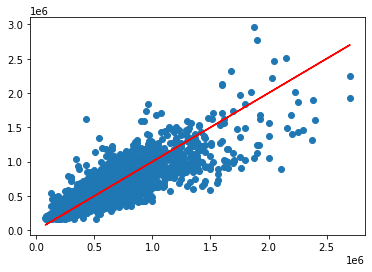

In [219]:
#our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [220]:
errors = y_test.reshape(6313, 1) - predictions

C:\Users\Harshit Srivastava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

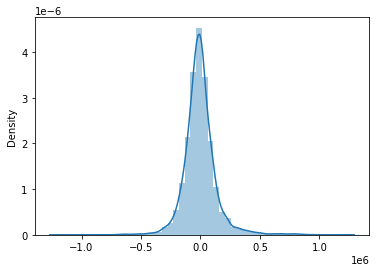

In [221]:
sns.distplot(errors)

### Predicting on a brand new house

In [222]:
single_house = df.drop('price',axis=1).iloc[0]

In [223]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [224]:
single_house

array([[0.09090909, 0.13333333, 0.22588832, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.54545455, 0.22588832,
        0.        , 0.47826087, 0.        , 0.56711082, 0.21760797,
        0.17455018, 0.00892733, 0.81818182, 0.        ]])

In [225]:
model.predict(single_house)

1/1 [==============================] - 0s 19ms/step


array([[286648.66]], dtype=float32)

In [226]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [227]:
single_house2 = df.drop('price',axis=1).iloc[59]

In [228]:
single_house2 = scaler.transform(single_house2.values.reshape(-1, 19))

In [229]:
single_house2


array([[0.09090909, 0.3       , 0.47208122, 0.01254816, 0.        ,
        0.        , 0.75      , 0.75      , 0.63636364, 0.32994924,
        0.26540284, 0.51304348, 0.        , 0.44101397, 0.14950166,
        0.40270822, 0.03258948, 1.        , 0.        ]])

In [230]:
model.predict(single_house2)

1/1 [==============================] - 0s 33ms/step


array([[571139.7]], dtype=float32)

In [231]:
df.iloc[59]

price            650000.0000
bedrooms              3.0000
bathrooms             2.2500
sqft_living        2150.0000
sqft_lot          21235.0000
floors                1.0000
waterfront            0.0000
view                  3.0000
condition             4.0000
grade                 8.0000
sqft_above         1590.0000
sqft_basement       560.0000
yr_built           1959.0000
yr_renovated          0.0000
lat                  47.4336
long               -122.3390
sqft_living15      2570.0000
sqft_lot15        18900.0000
month                12.0000
year               2014.0000
Name: 60, dtype: float64